In [1]:
### Regression Crypto predict ETH with neural network 
# (2layers, relu)  relu is linear
# (1 noactivation func at output, 2 sigmoid at output) # sigmold results will be binary

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start = '2020-01-01'
end = '2022-01-01'

In [3]:
data = yf.download(['BTC-USD', 'BNB-USD', 'XRP-USD', 'ETH-USD', 'ADA-USD', 'DOGE-USD'], start= start, end= end)

[*********************100%***********************]  6 of 6 completed


In [4]:
df = data.Close.copy()

In [5]:
doge = df.pop('DOGE-USD') ### pop out

In [6]:
eth = df.pop('ETH-USD')

In [7]:
df.insert(len(df.columns), 'ETH-USD', eth)

In [8]:
df = df.pct_change().dropna()

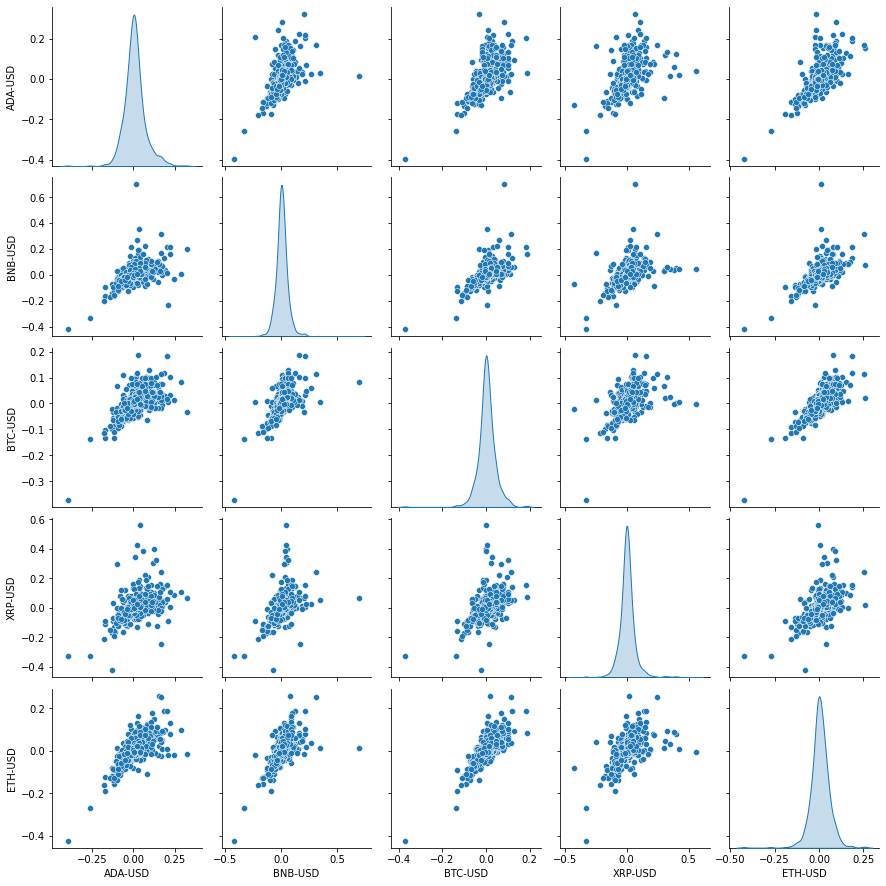

In [9]:
sns.pairplot(df, diag_kind= 'kde')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 40)

In [147]:
y_train

Date
2021-04-07   -0.069535
2020-11-27   -0.002520
2020-06-15   -0.017879
2020-04-16    0.123106
2021-12-20    0.002868
                ...   
2021-03-16    0.008522
2020-06-14   -0.020067
2020-01-08   -0.015924
2020-08-07   -0.039115
2020-11-22    0.015617
Name: ETH-USD, Length: 584, dtype: float64

In [92]:
model = Sequential()
model.add(Dense(5, activation= 'relu', input_dim=4))
model.add(Dense(5, activation= 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate= 0.005)
model.compile(
    optimizer= opt,
    loss= 'MeanSquaredError',
    metrics= 'acc'
)


In [93]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_37 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 6         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


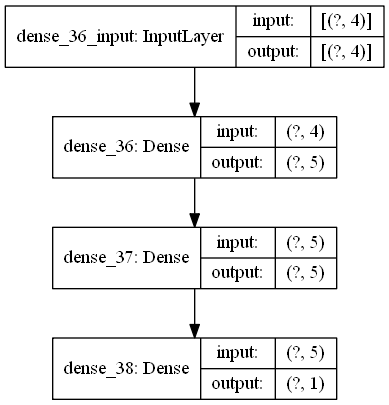

In [94]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.plot.png', show_shapes=True, show_layer_names=True)

In [95]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data= (X_test,y_test))

Epoch 1/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 2/200
59/59 [==============================] - 0s 760us/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 3/200
59/59 [==============================] - 0s 727us/step - loss: 9.8081e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 4/200
59/59 [==============================] - 0s 710us/step - loss: 9.0103e-04 - acc: 0.0000e+00 - val_loss: 9.2887e-04 - val_acc: 0.0000e+00
Epoch 5/200
59/59 [==============================] - 0s 710us/step - loss: 8.8084e-04 - acc: 0.0000e+00 - val_loss: 9.6914e-04 - val_acc: 0.0000e+00
Epoch 6/200
59/59 [==============================] - 0s 710us/step - loss: 8.6508e-04 - acc: 0.0000e+00 - val_loss: 8.8225e-04 - val_acc: 0.0000e+00
Epoch 7/200
59/59 [==============================] - 0s 727us/step - loss: 8.6913e-04 - acc: 0.0000e+00 - val_loss: 7.1955e-04 -

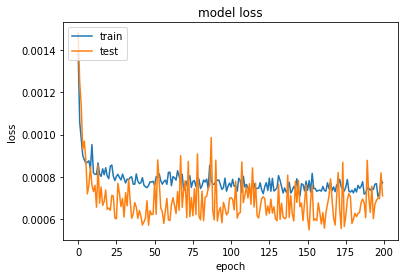

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [101]:
model.evaluate(X_test,y_test) # performance better than 1 laey with no activation function

5/5 [==============================] - 0s 598us/step - loss: 7.1047e-04 - acc: 0.0000e+00


[0.0007104669930413365, 0.0]

In [102]:
y_pred = model.predict(X_test)

In [103]:
compare = pd.DataFrame(y_test)
compare['y_pred'] = y_pred

In [104]:
((compare['y_pred'] * compare['ETH-USD']) > 0).sum()
### but wrong directhion than 1 layer ???? why

130

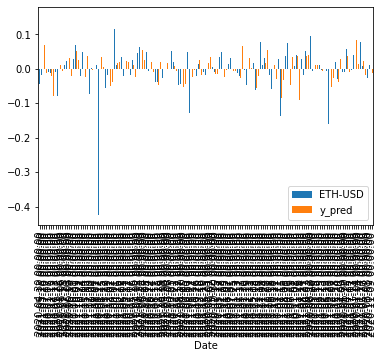

In [105]:
compare.plot(kind= 'bar')
plt.show()

# try sigmoid output

In [134]:
model2 = Sequential()
model2.add(Dense(5, activation= 'relu', input_dim= 4))
model2.add(Dense(5, activation= 'relu'))
model2.add(Dense(1, activation= 'sigmoid'))

opt = Adam(learning_rate= 0.0005)
model2.compile(
    optimizer= opt,
    loss= 'MeanSquaredError',
    metrics= ['accuracy']
)


In [135]:
history2 = model2.fit(X_train, y_train, epochs=250, batch_size=100, validation_split=0.2)

Epoch 1/250
5/5 [==============================] - 0s 23ms/step - loss: 0.2428 - accuracy: 0.0000e+00 - val_loss: 0.2394 - val_accuracy: 0.0000e+00
Epoch 2/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.0000e+00 - val_loss: 0.2366 - val_accuracy: 0.0000e+00
Epoch 3/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.0000e+00 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 4/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.0000e+00 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.0000e+00 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 6/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.0000e+00 - val_loss: 0.2247 - val_accuracy: 0.0000e+00
Epoch 7/250
5/5 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.0000e+00 - val_loss: 0.22

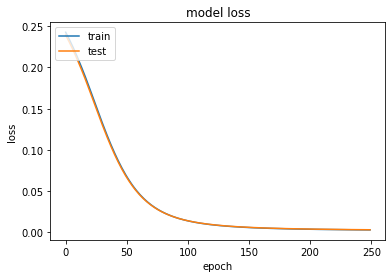

In [136]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [137]:
y2_pred = model2.predict(X_test)

In [138]:
model2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 798us/step - loss: 0.0041 - accuracy: 0.0000e+00


[0.004101223312318325, 0.0]

In [139]:
compare2 = pd.DataFrame(y_test)
compare2['y2_pred'] = y2_pred

In [140]:
((compare2['y2_pred'] * compare2['ETH-USD']) > 0).sum()

73

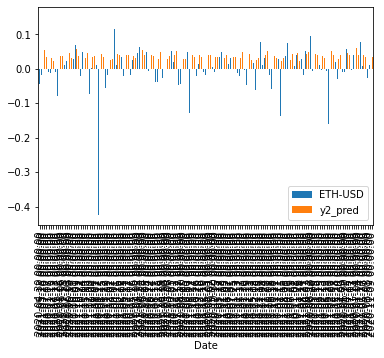

In [142]:
compare2.plot(kind= 'bar')
plt.show()